# February Trees and Ensembles Examples

In this notebook, we will explore some aspects of tree-based learning methods.  First, we will explore feature importances.  Then, we will compare performance from regular decision trees to ensemble-based methods.

In [1]:
# First, we import libraries and load the California Housing dataset
import pandas as pd

from sklearn.datasets import fetch_california_housing

X, y_reg = fetch_california_housing(return_X_y=True, as_frame=True)
y_class = (y_reg > y_reg.mean())
# y_reg.head()
y_class.value_counts()

MedHouseVal
False    12255
True      8385
Name: count, dtype: int64

In [2]:
# Next, we split the data up
from sklearn.model_selection import train_test_split
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X, y_class, y_reg, test_size=0.3, random_state=0)


## Decision Tree

Now, we train a decision tree using a scikit learn classifier

In [3]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_class_train)
preds = clf.predict(X_test)

print(confusion_matrix(y_class_test, preds))
print("Accuracy: ", accuracy_score(y_class_test, preds))

[[3185  501]
 [ 491 2015]]
Accuracy:  0.8397932816537468


This is great.  We have a 84% accuracy predicting if income is above or below the mean.  We can look at the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to see what types of misclassifications our model makes.  In this case, we make mistakes on 497 items of class 2, classifying them as class 1.

However, we don't know how the decision tree is making these distinctions - what aspects of the data is it using?  We can actually just print out the whole decision tree to get some information.

[Text(0.620267116547662, 0.9807692307692307, 'x[0] <= 4.598\ngini = 0.483\nsamples = 14448\nvalue = [8569, 5879]'),
 Text(0.3293561075322101, 0.9423076923076923, 'x[5] <= 2.453\ngini = 0.378\nsamples = 10500\nvalue = [7844.0, 2656.0]'),
 Text(0.47481161203993605, 0.9615384615384615, 'True  '),
 Text(0.16507399315253626, 0.9038461538461539, 'x[0] <= 3.01\ngini = 0.494\nsamples = 3079\nvalue = [1702, 1377]'),
 Text(0.09788888638616092, 0.8653846153846154, 'x[6] <= 37.905\ngini = 0.362\nsamples = 1499\nvalue = [1143, 356]'),
 Text(0.07468578250292819, 0.8269230769230769, 'x[7] <= -117.195\ngini = 0.446\nsamples = 1003\nvalue = [667, 336]'),
 Text(0.045938823317415986, 0.7884615384615384, 'x[0] <= 2.463\ngini = 0.482\nsamples = 791\nvalue = [470, 321]'),
 Text(0.019934228308856654, 0.75, 'x[2] <= 4.213\ngini = 0.408\nsamples = 420\nvalue = [300, 120]'),
 Text(0.009505360843319217, 0.7115384615384616, 'x[5] <= 2.012\ngini = 0.477\nsamples = 226\nvalue = [137, 89]'),
 Text(0.0047752049734210

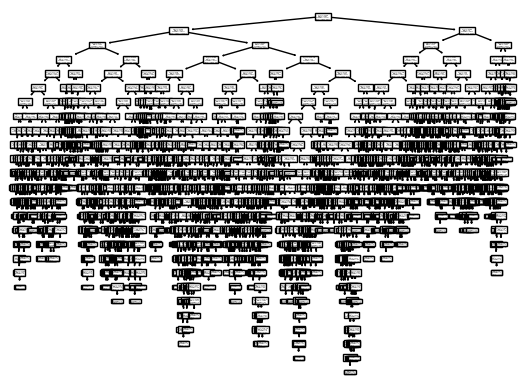

In [4]:
tree.plot_tree(clf)

Ok, that tree is too big.  We could look at the first few splits to see what the most important features are, but it would be a lot easier if we had some metric to compare and rank them.

`sklearn` actually has a `feature_importances_` property for all of its models that estimates a numerical value for feature importances.  For decision trees, it is based on the normalized reduction in entropy across the tree.  It is also called the Gini importance.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'HouseAge'),
  Text(2, 0, 'AveRooms'),
  Text(3, 0, 'AveBedrms'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'AveOccup'),
  Text(6, 0, 'Latitude'),
  Text(7, 0, 'Longitude')])

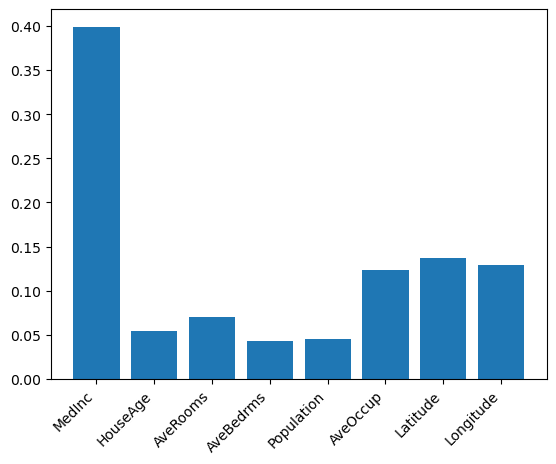

In [5]:
from matplotlib import pyplot as plt

plt.bar(X.columns, clf.feature_importances_)
plt.xticks(rotation=45, ha="right")

## Random Forests

Next, let's build a random forest.  Note that we can't print out a random forest because it is a forest!  It typically is composed of hundreds of trees.

However, Random Forests also have a `feature_importances_` attribute.  It is calculated as the normalized decrease in entropy but averaged across all trees.

Note that feature importances for more complicated models get further and further from being easy to interpret.  They are more and more abstract and more and more vullnerable to misinterpretation.  See end of Raschka chapter 4 for more details.

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf = clf_rf.fit(X_train, y_class_train)
rf_preds = clf_rf.predict(X_test)
print(confusion_matrix(y_class_test, rf_preds))
print("Accuracy: ", accuracy_score(y_class_test, rf_preds))

[[3413  273]
 [ 391 2115]]
Accuracy:  0.8927648578811369


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'HouseAge'),
  Text(2, 0, 'AveRooms'),
  Text(3, 0, 'AveBedrms'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'AveOccup'),
  Text(6, 0, 'Latitude'),
  Text(7, 0, 'Longitude')])

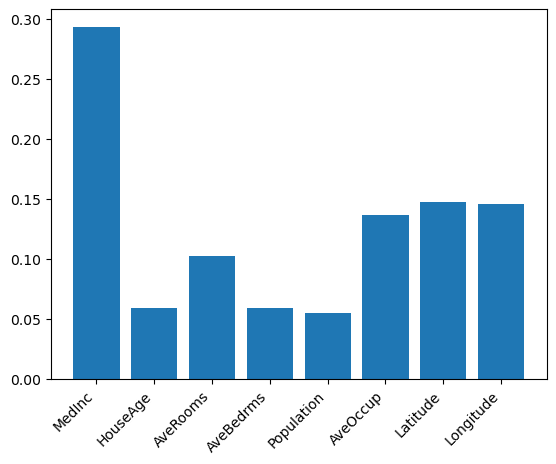

In [7]:
plt.bar(X.columns, clf_rf.feature_importances_)
plt.xticks(rotation=45, ha="right")

The accuracy went up from 84\% to 89\%.  It largely used the same features.

## Random Forest Regressor

Random Forests can also be used for regression.  They average the numeric labels for the training examples that have the same paths through the random forest as new test examples.

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg_rf = RandomForestRegressor(n_estimators=100)

reg_rf = reg_rf.fit(X_train, y_reg_train)
reg_rf_preds = reg_rf.predict(X_test)
print("MSE: ", mean_squared_error(y_reg_test, reg_rf_preds))


MSE:  0.27305533471689597


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'HouseAge'),
  Text(2, 0, 'AveRooms'),
  Text(3, 0, 'AveBedrms'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'AveOccup'),
  Text(6, 0, 'Latitude'),
  Text(7, 0, 'Longitude')])

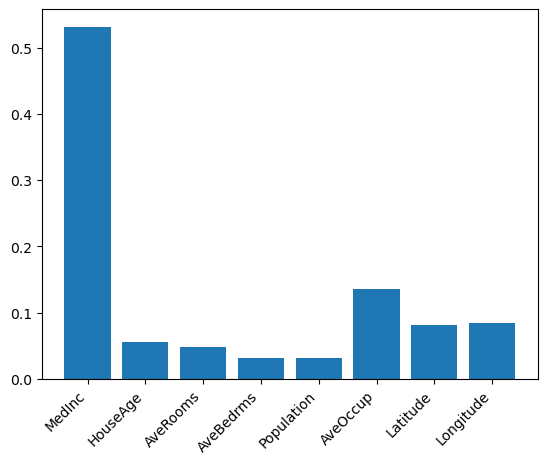

In [9]:
plt.bar(X.columns, reg_rf.feature_importances_)
plt.xticks(rotation=45, ha="right")

Text(0.5, 1.0, 'Regression predictions of random forest regressor')

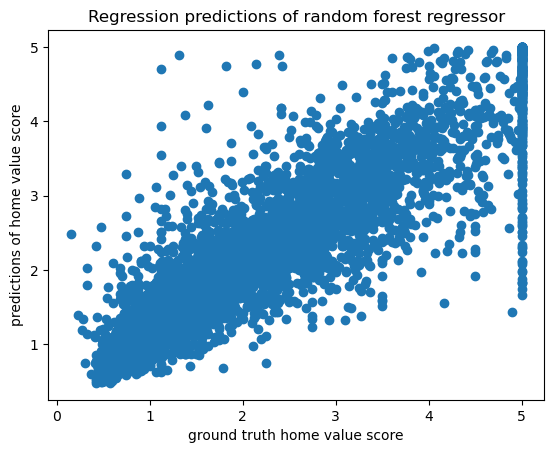

In [10]:
# With regression, it can be better to look at the comparison of our predictions to the true values

plt.plot(y_reg_test, reg_rf_preds, 'o')
plt.ylabel("predictions of home value score")
plt.xlabel("ground truth home value score")
plt.title("Regression predictions of random forest regressor")